# Setup do Pycaret

In [ ]:
!pip install pycaret==2.3.10 markupsafe==2.0.1 Jinja2 -qq

     |████████████████████████████████| 320 kB 8.4 MB/s 
     |████████████████████████████████| 17.0 MB 143 kB/s 
     |████████████████████████████████| 134 kB 42.6 MB/s 
     |████████████████████████████████| 1.7 MB 41.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 36.7 MB/s 
     |████████████████████████████████| 3.3 MB 44.4 MB/s 
     |████████████████████████████████| 10.4 MB 41.7 MB/s 
     |████████████████████████████████| 88 kB 7.5 MB/s 
     |████████████████████████████████| 25.9 MB 1.5 MB/s 
     |████████████████████████████████| 1.3 MB 40.4 MB/s 
     |████████████████████████████████| 167 kB 68.1 MB/s 
     |████████████████████████████████| 56 kB 6.0 MB/s 
     |████████████████████████████████| 2.0 MB 37.9 MB/s 
     |████████████████████████████████| 636 kB 54.9 MB/s 
     |█████████████████

In [ ]:
from pycaret.utils import version
version()

'2.3.10'

# 1. Importar o dataset

### **Importante**: para rodar esse notebook, é necessário criar um atalho na raiz do seu Google Drive para a pasta do Grupo 1 no Google Drive da sala e ter as permissões de acesso adequadas. Siga o passo a passo no notebook [neste link](https://colab.research.google.com/drive/1gcgucA_kH5xj9dncwh1sUfaLRROkbm3G#scrollTo=GJe2F3xyOayd), substituindo a pasta "Base" por "Grupo 1 - Rappi IA" 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Grupo 1 - RappIA /features.csv', index_col=0)

# 70% do dataset vai ser o conjunto de treino
train = data.sample(frac=0.7, random_state=42)
# 30% do dataset vai ser o conjunto de teste
test = data.drop(train.index)

data.head(3)



,ID,IS_CHURN,LEVEL_NAME,AUTO_ACCEPT,ACCEPTANCE_RATE,ORDERS_DONE,ORDERS_LAST_30D_COUNT,ORDERS_CANCEL,ORDERS_CANCELED_LAST_30D_COUNT,FIRST_ORDER_DATE,...,PRODUCT_RETURNS,SUPPORT_TICKET_COUNT,DEFECTS_COUNT,AVG_DISTANCE_TO_USER,TRANSPORT_bicycle,TRANSPORT_car,TRANSPORT_motorbike,TRANSPORT_neither,TRANSPORT_cargo_van,TRANSPORT_motorbike_trailer
0,1552668,False,1,True,1.000,0,4,1,0,738354,...,0.0,0,2,3.765437,0,0,1,0,0,0
1,1552649,False,3,True,0.778,4,122,1,2,738353,...,0.0,0,8,4.014581,0,0,1,0,0,0
2,1552604,False,2,True,1.000,3,57,0,1,738353,...,0.0,0,9,1.517087,1,0,0,0,0,0


## Verificar se existem valores nulos

In [ ]:
data.isnull().sum()

ID                                0
IS_CHURN                          0
LEVEL_NAME                        0
AUTO_ACCEPT                       0
ACCEPTANCE_RATE                   0
ORDERS_DONE                       0
ORDERS_LAST_30D_COUNT             0
ORDERS_CANCEL                     0
ORDERS_CANCELED_LAST_30D_COUNT    0
FIRST_ORDER_DATE                  0
LAST_ORDER_DATE                   0
EARNINGS                          0
TIPS                              0
PUNISHMENT_MINUTES                0
PRODUCT_RETURNS                   0
SUPPORT_TICKET_COUNT              0
DEFECTS_COUNT                     0
AVG_DISTANCE_TO_USER              0
TRANSPORT_bicycle                 0
TRANSPORT_car                     0
TRANSPORT_motorbike               0
TRANSPORT_neither                 0
TRANSPORT_cargo_van               0
TRANSPORT_motorbike_trailer       0
dtype: int64

## Análise gráfica preliminar

In [ ]:
import plotly.express as px

fig = px.scatter(x=data['FIRST_ORDER_DATE'], y=data['EARNINGS'], 
                 color = data['IS_CHURN'], template = 'presentation', 
                 opacity = 0.5, facet_col = data['LEVEL_NAME'], 
                 category_orders={"facet_col": [0, 1, 2, 3, 4]},
                 title = 'Rendimento vs. Tempo de Cadastro para cada nível',
                 labels = {'x' : 'Tempo de cadastro', 'y' : 'Rendimentos'})
                
fig.show()

# 2. Preprocessamento dos Dados

**IMPORTANTE: Essa célula irá "quebrar" na primeira vez que rodar. Rode ela novamente e funcionára. Além disso, essa etapa exige que se aperte a tecla "Enter" no final. Se isso não for feito, não irá para próxima célula.**

In [ ]:
import jinja2
from pycaret.classification import *

s = setup(data, 
          target = 'IS_CHURN',
          ordinal_features={ 'LEVEL_NAME' : ['0', '1', '2', '3', '4'] },
          ignore_features = ['ID', 'ORDERS_LAST_30D_COUNT', 'LAST_ORDER_DATE', 'SUPPORT_TICKET_COUNT'], 
          normalize=True, 
          fix_imbalance=True
        )

,Description,Value
0,session_id,2422
1,Target,IS_CHURN
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(159528, 24)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,8
8,Ordinal Features,True
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['ID',
                                                       'ORDERS_LAST_30D_COUNT',
                                                       'LAST_ORDER_DATE',
                                                       'SUPPORT_TICKET_COUNT'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='IS_CHURN',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_availab...
                ('P_transform', 'passthrough'), ('binn', 'passthrou

# 3. Comparar Modelos

In [ ]:
[best1, best2, best3, best4, best5, best6, best7, best8, best9, best10] = compare_models(n_select=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9316,0.9543,0.9623,0.9549,0.9585,0.7626,0.7629,7.306
rf,Random Forest Classifier,0.9297,0.9521,0.9590,0.9556,0.9573,0.7580,0.7581,48.328
et,Extra Trees Classifier,0.9269,0.9479,0.9558,0.9552,0.9555,0.7496,0.7496,31.776
gbc,Gradient Boosting Classifier,0.9229,0.9505,0.9464,0.9593,0.9528,0.7427,0.7432,59.128
ada,Ada Boost Classifier,0.9165,0.9467,0.9403,0.9574,0.9487,0.7234,0.7244,15.838
svm,SVM - Linear Kernel,0.9023,0.0000,0.9355,0.9452,0.9403,0.6721,0.6729,5.409
lr,Logistic Regression,0.8889,0.9236,0.9091,0.9536,0.9308,0.6497,0.6545,7.060
dt,Decision Tree Classifier,0.8858,0.8331,0.9149,0.9445,0.9294,0.6305,0.6327,6.840
knn,K Neighbors Classifier,0.8563,0.8872,0.8676,0.9533,0.9085,0.5773,0.5914,33.684
ridge,Ridge Classifier,0.8439,0.0000,0.8598,0.9454,0.9006,0.5414,0.5549,4.332


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2422, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,

# 4. Analisar o melhor modelo

In [ ]:
evaluate_model(best)

# 5. Realizar predições para novos dados

In [ ]:
predictions = predict_model(best, data=test)

# 6. Salvar a melhor pipeline

In [ ]:
save_model(best, 'minha_melhor_pipeline')

# 6. Análises gráficas do melhor modelo

## Plot de importância das features

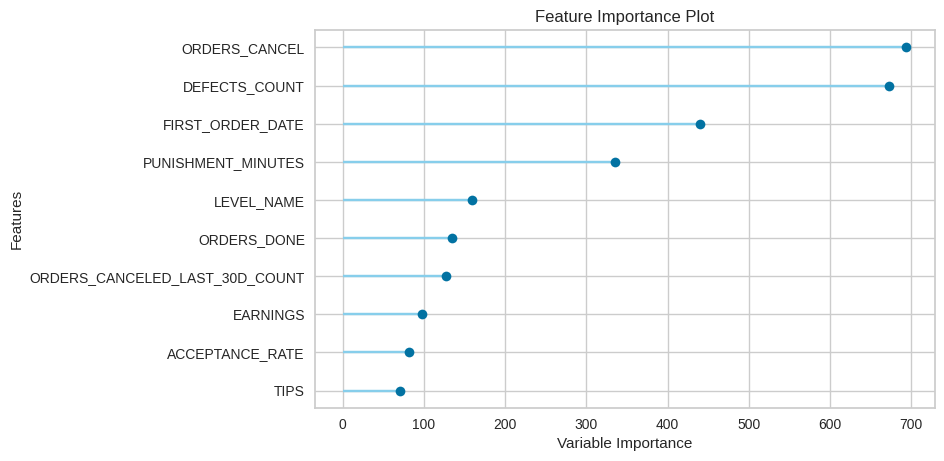

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best1, plot = 'feature')

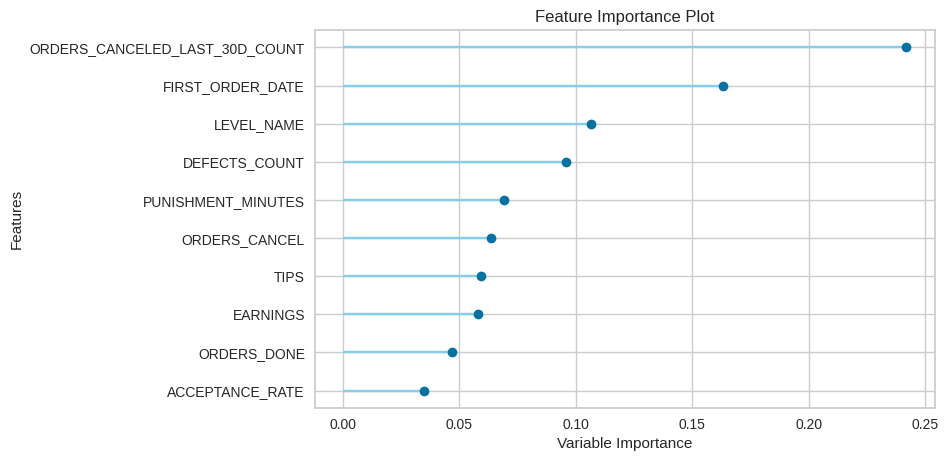

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best2, plot = 'feature')

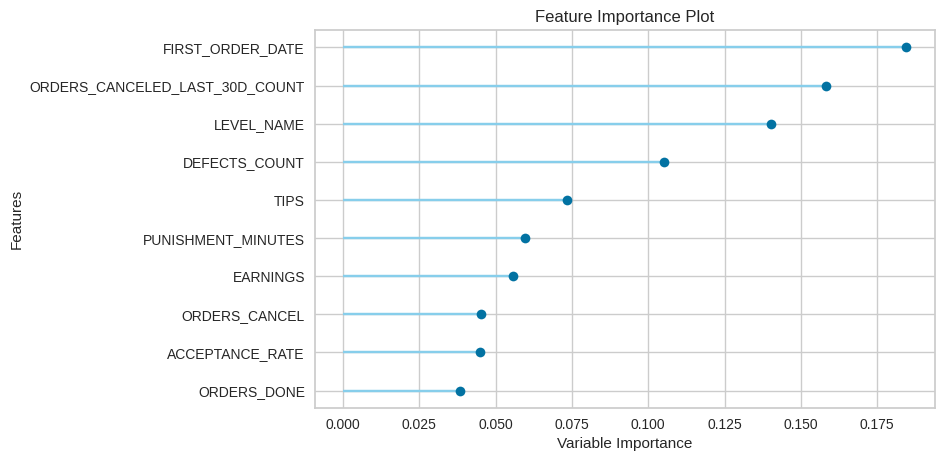

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best3, plot = 'feature')

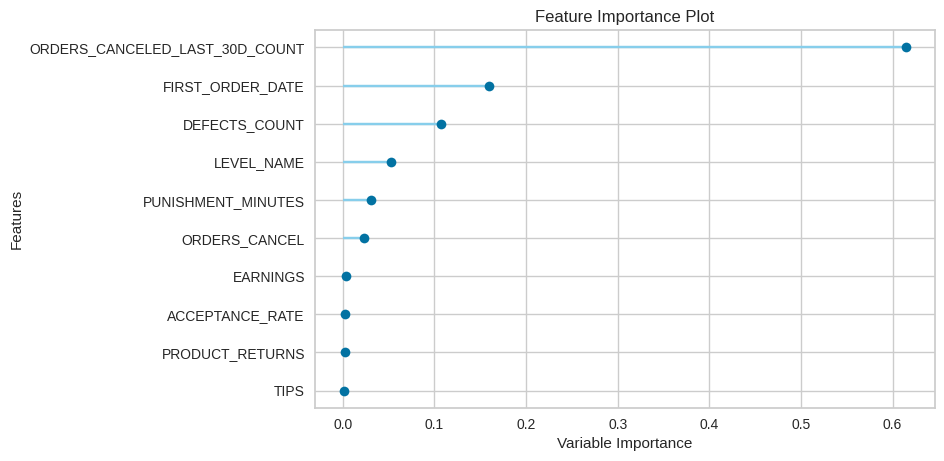

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best4, plot = 'feature')

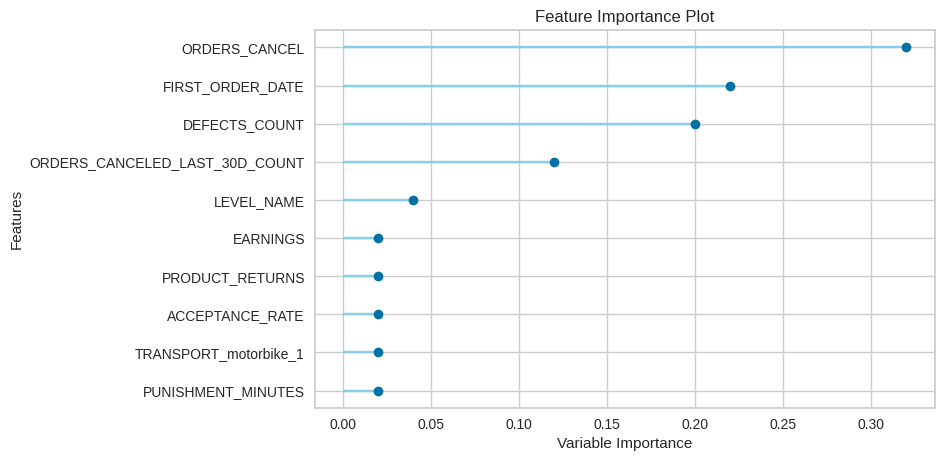

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best5, plot = 'feature')

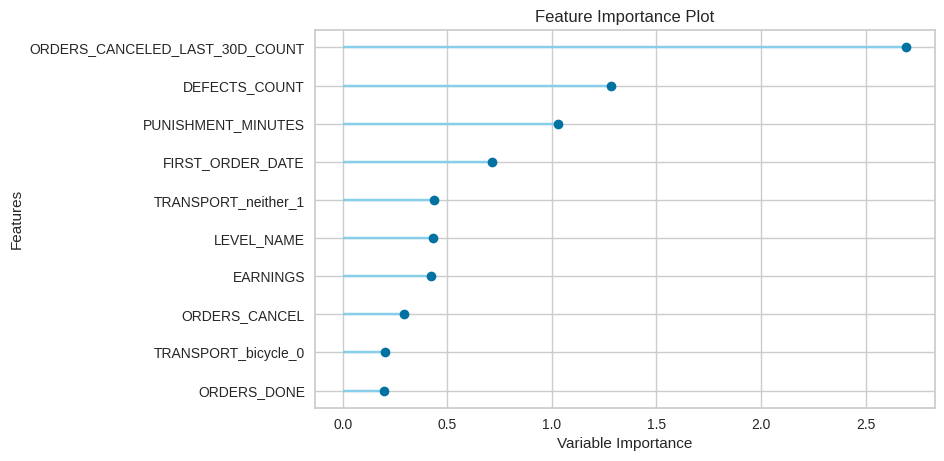

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best6, plot = 'feature')

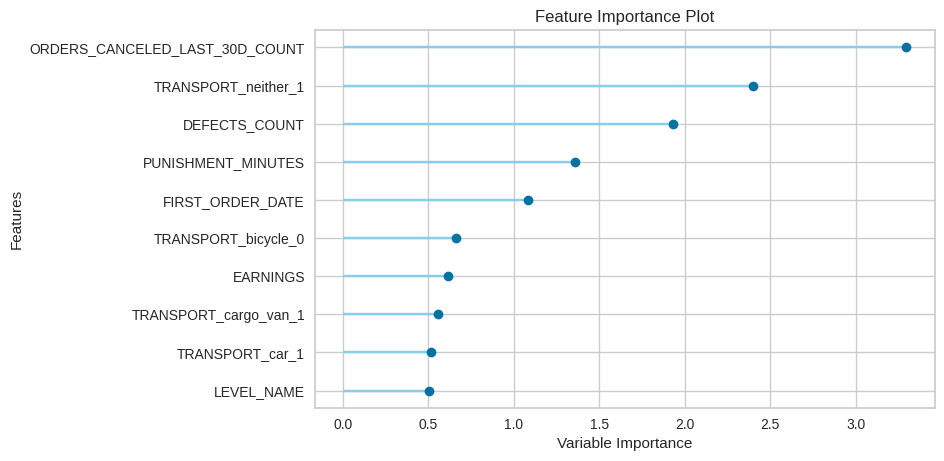

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best7, plot = 'feature')

## Matriz de Confusão

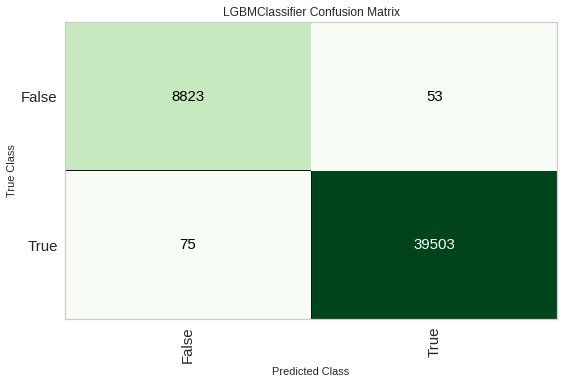

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best, plot = 'confusion_matrix')